### **Insall nessaray libraries and packages**

In [ ]:
!pip install utils

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline
import pandas as pd

In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

In [ ]:
from keras.utils import to_categorical
from sklearn.utils import shuffle

**Load the dataset**

In [ ]:
TRAIN_DIR_Female = '/content/drive/MyDrive/Reserch/Female/train/'
TEST_DIR_Female = '/content/drive/MyDrive/Reserch/Female/Test/'

# **Preprocess the dataset**

**Read Images from the data path**

In [ ]:
import cv2

In [ ]:
TRAIN_DIR_Female = '/content/drive/MyDrive/Reserch/Female/train/'
data_dir_sequence = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad']


img_data_list = []
emotion_counts_tr_female = {}

for dataset in data_dir_sequence:
    img_list = os.listdir(os.path.join(TRAIN_DIR_Female, dataset))
    count = len(img_list)
    emotion_counts_tr_female[dataset] = count
    print('Loaded {} images for the dataset-{}\n'.format(count, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(TRAIN_DIR_Female, dataset, img))
        if input_img is not None:
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            img_data_list.append(input_img)
        else:
            print(f"Failed to read image: {img}")

img_data_train_female = np.array(img_data_list)
img_data_train_female = img_data_train_female.astype('float32')
img_data_train_female = img_data_train_female/ 255

# img_data_test_female = img_data_train_female.reshape(-1, 48, 48)  # Reshape the array to (total_count, 48, 48)

print("Emotion Counts:")
for emotion, count in emotion_counts_tr_female.items():
    print("{}: {}".format(emotion, count))


Loaded 1545 images for the dataset-angry

Loaded 562 images for the dataset-disgust

Loaded 2498 images for the dataset-fear

Loaded 2824 images for the dataset-happy

Loaded 2172 images for the dataset-neutral

Loaded 2788 images for the dataset-sad

Failed to read image: desktop.ini
Emotion Counts:
angry: 1545
disgust: 562
fear: 2498
happy: 2824
neutral: 2172
sad: 2788


In [ ]:
img_data_train_female.shape

(12388, 48, 48)

In [ ]:
TEST_DIR_Female = '/content/drive/MyDrive/Reserch/Female/Test/'
data_dir_sequence = ['angry', 'disgust', 'fear', 'happy', 'neutral','sad']

img_data_list = []
emotion_counts_te_female = {}

for dataset in data_dir_sequence:
    img_list = os.listdir(os.path.join(TEST_DIR_Female, dataset))
    count = len(img_list)
    emotion_counts_te_female[dataset] = count
    print('Loaded {} images for the dataset-{}\n'.format(count, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(TEST_DIR_Female, dataset, img))
        if input_img is not None:
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            img_data_list.append(input_img)
        else:
            print(f"Failed to read image: {img}")

img_data_test_female = np.array(img_data_list)
img_data_test_female = img_data_test_female.astype('float32')
img_data_test_female = img_data_test_female / 255

# img_data_test_female = img_data_test_female.reshape(-1, 48, 48)  # Reshape the array to (total_count, 48, 48)

print("Emotion Counts:")
for emotion, count in emotion_counts_te_female.items():
    print("{}: {}".format(emotion, count))


Loaded 314 images for the dataset-angry

Loaded 112 images for the dataset-disgust

Loaded 593 images for the dataset-fear

Loaded 588 images for the dataset-happy

Loaded 438 images for the dataset-neutral

Loaded 563 images for the dataset-sad

Emotion Counts:
angry: 314
disgust: 112
fear: 593
happy: 588
neutral: 438
sad: 563


In [ ]:
img_data_test_female.shape

(2608, 48, 48)

**Data set distribution**

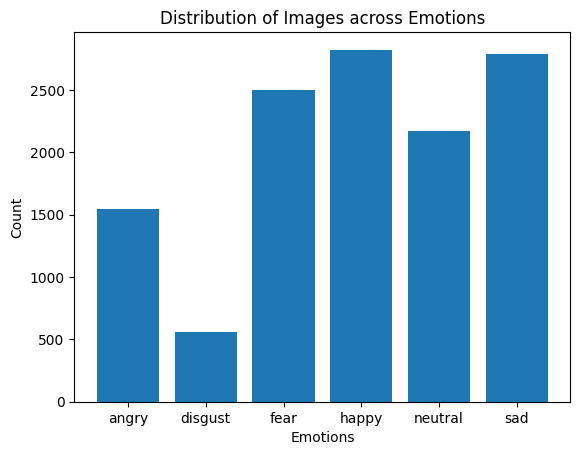

In [ ]:
emotions_tr_fe = list(emotion_counts_tr_female.keys())
counts_tr_fe = list(emotion_counts_tr_female.values())

# Create a bar chart
plt.bar(emotions_tr_fe,counts_tr_fe)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Images across Emotions')
plt.show()

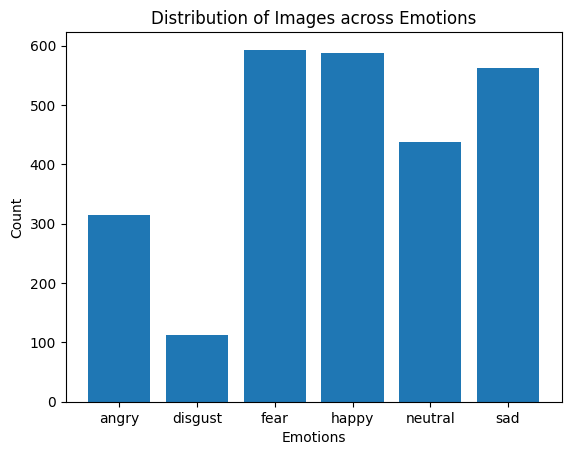

In [ ]:
emotions_te_fe = list(emotion_counts_te_female.keys())
counts_te_fe = list(emotion_counts_te_female.values())

# Create a bar chart
plt.bar(emotions_te_fe,counts_te_fe)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Images across Emotions')
plt.show()

**Define the number of classes**

In [ ]:
from keras.utils import to_categorical

num_classes = 6
num_of_samples_train_female = img_data_train_female.shape[0]

labels_train_female = np.ones((num_of_samples_train_female,), dtype='int64')
labels_train_female[0:1545] = 5  # 1545 Angry
labels_train_female[1545:2107] = 4  # 562 Disgust
labels_train_female[2107:4605] = 3  # 2498 Fear
labels_train_female[4605:7429] = 0  # 2824 Happy
labels_train_female[7429:9601] = 2  # 2172 neutral
labels_train_female[9601:] = 1  # 2788 Sad
# labels_train_female[8454:] = 2  # 1566 Surprise

names = ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY']

def getLabel(id):
    return ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY'][id]

# labels_train_female_encoded = to_categorical(labels_train_female, num_classes=num_classes)

In [ ]:
labels_train_females = np.bincount(labels_train_female)

# Print the count of each label
for i, count in enumerate(labels_train_females):
    label_name = getLabel(i)
    print("{}: {}".format(label_name, count))

HAPPY: 2824
SAD: 2787
NEUTRAL: 2172
FEAR: 2498
DISGUST: 562
ANGRY: 1545


In [ ]:
from keras.utils import to_categorical

num_classes = 6
num_of_samples_te_female = img_data_test_female.shape[0]

labels_test_female = np.ones((num_of_samples_te_female,), dtype='int64')
labels_test_female[0:314] = 5  # 314 Angry
labels_test_female[314:426] = 4  # 112 Disgust
labels_test_female[426:1019] = 3  # 593 Fear
labels_test_female[1019:1607] = 0  # 588 Happy
labels_test_female[1607:2045] = 2  #  438 neutral
labels_test_female[2045:] = 1  #  563 Sad
# labels_test_female[2589:] = 2  # 418 Surprise

names = ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY']

def getLabel(id):
    return ['HAPPY', 'SAD', 'NEUTRAL', 'FEAR', 'DISGUST', 'ANGRY'][id]

# labels_train_female_encoded = to_categorical(labels_train_female, num_classes=num_classes)


In [ ]:
labels_test_females = np.bincount(labels_test_female)

# Print the count of each label
for i, count in enumerate(labels_test_females):
    label_name = getLabel(i)
    print("{}: {}".format(label_name, count))

HAPPY: 588
SAD: 563
NEUTRAL: 438
FEAR: 593
DISGUST: 112
ANGRY: 314


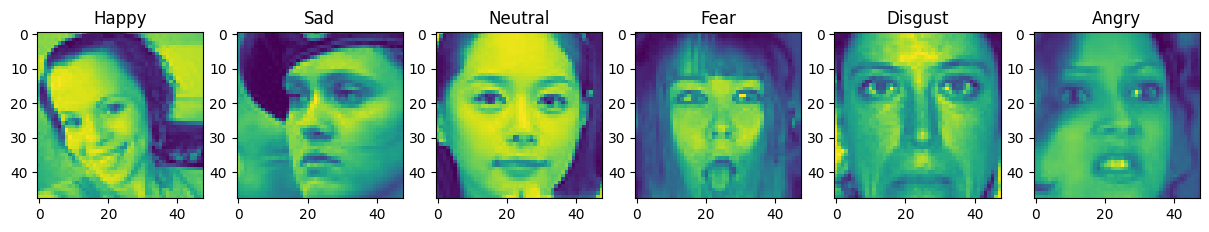

In [ ]:
import matplotlib.pyplot as plt

# Get index of images representing each expression
happy_idx = np.where(labels_test_female == 0)[0][0]
sad_idx = np.where(labels_test_female == 1)[0][0]
neutral_idx = np.where(labels_test_female == 2)[0][0]
fear_idx = np.where(labels_test_female == 3)[0][0]
disgust_idx = np.where(labels_test_female == 4)[0][0]
angry_idx = np.where(labels_test_female== 5)[0][0]

# Plotting the images
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
axs[0].imshow(img_data_test_female[happy_idx])
axs[0].set_title("Happy")
axs[1].imshow(img_data_test_female[sad_idx])
axs[1].set_title("Sad")
axs[2].imshow(img_data_test_female[neutral_idx])
axs[2].set_title("Neutral")
axs[3].imshow(img_data_test_female[fear_idx])
axs[3].set_title("Fear")
axs[4].imshow(img_data_test_female[disgust_idx])
axs[4].set_title("Disgust")
axs[5].imshow(img_data_test_female[angry_idx])
axs[5].set_title("Angry")

plt.show()


In [ ]:
print(labels_test_female.shape,labels_train_female.shape)

(2608,) (12388,)


**Convert the class label to one-hot encoding**

In [ ]:
# convert class labels to on-hot encoding# conve
Y_Fe_tr = to_categorical(labels_train_female, num_classes)
Y_Fe_ts = to_categorical(labels_test_female, num_classes)

In [ ]:
print(Y_Fe_tr.shape,Y_Fe_ts.shape)

(12388, 6) (2608, 6)


**Shuffle the dataset**

In [ ]:
#Shuffle the dataset
x_train_female,y_train_female = shuffle(img_data_train_female,Y_Fe_tr, random_state=2)
x_test_female,y_test_female = shuffle(img_data_test_female,Y_Fe_ts, random_state=2)

In [ ]:
X_train_female = x_train_female
Y_train_female =y_train_female
X_test_female =x_test_female
Y_test_female =y_test_female

In [ ]:
print(X_train_female.shape,Y_train_female.shape,X_test_female.shape,Y_test_female.shape)

(12388, 48, 48) (12388, 6) (2608, 48, 48) (2608, 6)


In [ ]:
# X_train_female = np.stack((X_train_female,)*3, axis = -1)
# X_test_female = np.stack((X_test_female,)*3, axis = -1)

In [ ]:
X_train_female = X_train_female.reshape(X_train_female.shape[0], X_train_female.shape[1], X_train_female.shape[2], 1)
X_test_female  = X_test_female .reshape(X_test_female .shape[0],X_test_female .shape[1], X_test_female .shape[2], 1)

In [ ]:
print(X_train_female.shape,Y_train_female.shape,X_test_female.shape,Y_test_female.shape)

(12388, 48, 48, 1) (12388, 6) (2608, 48, 48, 1) (2608, 6)


# **Handling imbalncing**

**Class weights**

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight="balanced",
    classes=np.unique(labels_train_female),
    y=labels_train_female
)

class_weights = dict(zip(np.unique(labels_train_female), class_weights))

In [ ]:
class_weights

{0: 0.7311142587346553,
 1: 0.7408204760196149,
 2: 0.9505831798649478,
 3: 0.8265278889778489,
 4: 3.6737841043890866,
 5: 1.336353829557713}

**Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        samplewise_std_normalization=False,  # divide each input by its std
                        zca_whitening=False,
                        rotation_range=20,
                        shear_range = 20,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)


balanced_gen_female = data_generator.flow(X_train_female,Y_train_female,)


**Learning Rate Scheduler**

In [ ]:
# filepath = '/content/drive/MyDrive/Reserch/best_model_cifar10.hdf5'
# from tensorflow.keras.callbacks import Callback
# from tensorflow.keras.callbacks import EarlyStopping


# checkpoint = ModelCheckpoint(filepath=filepath,
#                              monitor='val_accuracy',
#                              verbose=1,
#                              save_best_only=True)

# stop = EarlyStopping(monitor='val_accuracy', patience =5,
#                       verbose=0, mode='auto', baseline=None,
#                       restore_best_weights=False)

# callbacks = [checkpoint,stop,callback_lr]

In [ ]:
from keras import layers


# **Model Buliding**

In [ ]:
from keras import layers
from keras.models import Sequential
from keras.regularizers import l2  # Import l2 function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense, Input, Add ,AveragePooling2D
from keras.models import Model
from keras.initializers import glorot_uniform

In [ ]:
batch_size = 32
num_epochs = 150
input_shape = (48, 48, 1)
verbose = 1
num_classes = 6
base_path = './model/'
l2_regularization=0.01

In [ ]:
filepath = '/content/drive/MyDrive/Reserch/models/best_model_cifar10_femaleconfu.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

In [ ]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

patience = 25

early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1, patience=int(patience/2), verbose=1)


callbacks = [checkpoint,early_stop,reduce_lr]

In [ ]:
pip install efficientnet

In [ ]:
def identity_block(X, f, filters, stage, block,dropout_rate=0.2):
    """
    Implementation of the identity block

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network

    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)


    # Second component of main path
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X = Activation('relu')(X)
    X = Dropout(dropout_rate)(X)  # Add dropout layer


    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X_shortcut,X])
    X = Activation("relu")(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2,dropout_rate=0.2):
    """
    Implementation of the convolutional block4

    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used

    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a',padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(F2, (f, f), strides = (1,1), name = conv_name_base + '2b',padding = 'same', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(F3, (1, 1), strides = (1,1), name = conv_name_base + '2c',padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '1',padding = 'valid', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    X = Activation('relu')(X)
    X = Dropout(dropout_rate)(X)  # Add dropout layer

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X_shortcut,X])
    X = Activation("relu")(X)

    return X

In [ ]:
def Net50(input_shape = (48,48,1), classes = 6 , dropout_rate=0.2):

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)


    # Zero-Padding
    #X = ZeroPadding2D((1, 1))(X_input)
    X = X_input
    # Stage 1

    X = Conv2D(8, (3, 3), strides = (1, 1), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    # removed maxpool
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [32, 32, 128], stage = 2, block='a', s = 1,dropout_rate=dropout_rate)
    X = identity_block(X, 3, [32, 32, 128], stage=2, block='b')
    X = identity_block(X, 3, [32, 32, 128], stage=2, block='c')


    # Stage 3
    X = convolutional_block(X, f = 3, filters = [64,64,256], stage = 3, block='a', s = 2,dropout_rate=dropout_rate)
    X = identity_block(X, 3, [64,64,256], stage=3, block='b')
    X = identity_block(X, 3, [64,64,256], stage=3, block='c')
    X = identity_block(X, 3, [64,64,256], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 4, block='a', s = 2,dropout_rate=dropout_rate)
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='d')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='e')
    X = identity_block(X, 3, [128, 128, 512], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 5, block='a', s = 2,dropout_rate=dropout_rate)
    X = identity_block(X, 3, [256, 256, 1024], stage=5, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=5, block='c')

    # AVGPOOL .
    X = AveragePooling2D((2,2), name='avg_pool')(X)

    # output layer
    X = Flatten()(X)
    X = Dense(512, activation = 'relu', name='fc1024' , kernel_initializer = glorot_uniform(seed=0))(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)


    # Create model
    model = Model(inputs = X_input, outputs = X, name='Net50')

    return model

# **Train the model**

In [ ]:
from keras.optimizers import Adam, SGD
model = Net50(input_shape = (48, 48, 1), classes = 6,dropout_rate=0.2)
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "Net50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 46, 46, 8)    80          ['input_2[0][0]']                
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 46, 46, 8)    32          ['conv1[0][0]']                  
                                                                                                  
 activation_65 (Activation)     (None, 46, 46, 8)    0           ['bn_conv1[0][0]']               
                                                                                              

In [ ]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [ ]:
history = model.fit(balanced_gen_female, steps_per_epoch=len(X_train_female) /batch_size,epochs=num_epochs, verbose=1,class_weight=class_weights, callbacks=callbacks,validation_data= (X_test_female,Y_test_female))

Epoch 1/150
388/387 [==============================] - ETA: 0s - loss: 2.5074 - accuracy: 0.2391
Epoch 1: val_accuracy improved from -inf to 0.22814, saving model to /content/drive/MyDrive/Reserch/models/best_model_cifar10_femaleconfu.hdf5
387/387 [==============================] - 75s 163ms/step - loss: 2.5074 - accuracy: 0.2391 - val_loss: 1.6880 - val_accuracy: 0.2281 - lr: 5.0000e-04
Epoch 2/150
388/387 [==============================] - ETA: 0s - loss: 1.6904 - accuracy: 0.2702
Epoch 2: val_accuracy improved from 0.22814 to 0.30483, saving model to /content/drive/MyDrive/Reserch/models/best_model_cifar10_femaleconfu.hdf5
387/387 [==============================] - 57s 148ms/step - loss: 1.6904 - accuracy: 0.2702 - val_loss: 1.6536 - val_accuracy: 0.3048 - lr: 5.0000e-04
Epoch 3/150
388/387 [==============================] - ETA: 0s - loss: 1.6403 - accuracy: 0.3134
Epoch 3: val_accuracy improved from 0.30483 to 0.31097, saving model to /content/drive/MyDrive/Reserch/models/best_mod

In [ ]:
loss, accuracy = model.evaluate(X_test_female,Y_test_female)

82/82 [==============================] - 3s 31ms/step - loss: 1.0847 - accuracy: 0.6722


**Prediction results**

In [ ]:
# Assuming you have a trained model named 'model' and training data X_train and corresponding labels Y_train

# Define the emotion label mapping
label_mapping = {
    0: "happy",
    1: "sad",
    2: "neutral",
    3: "fear",
    4: "disgust",
    5: "angry"
}

# Make predictions on the training data
Y_pred = model.predict(X_train_female)

# Select a few examples to display
num_examples = 10
indices = np.random.randint(0, len(X_train_female), num_examples)

# Display the predicted and actual labels for the selected examples
for index in indices:
    predicted_label = np.argmax(Y_pred[index])  # Get the index of the predicted class with the highest probability
    actual_label = np.argmax(Y_train_female[index])  # Get the index of the actual class
    predicted_emotion = label_mapping[predicted_label]
    actual_emotion = label_mapping[actual_label]
    print("Example {}: Predicted label = {}, Actual label = {}".format(index, predicted_emotion, actual_emotion))

388/388 [==============================] - 15s 32ms/step
Example 11395: Predicted label = fear, Actual label = fear
Example 5515: Predicted label = fear, Actual label = angry
Example 5091: Predicted label = neutral, Actual label = neutral
Example 4314: Predicted label = neutral, Actual label = neutral
Example 10266: Predicted label = fear, Actual label = fear
Example 1942: Predicted label = happy, Actual label = happy
Example 11959: Predicted label = sad, Actual label = sad
Example 7928: Predicted label = neutral, Actual label = neutral
Example 4079: Predicted label = sad, Actual label = sad
Example 5640: Predicted label = fear, Actual label = fear


In [ ]:
from tabulate import tabulate

# Define the emotion label mapping
label_mapping = {
    0: "happy",
    1: "sad",
    2: "neutral",
    3: "fear",
    4: "disgust",
    5: "angry"
}

# Make predictions on the training data
Y_pred = model.predict(X_train_female)

# Select a few examples to display
num_examples = 10
indices = np.random.randint(0, len(X_train_female), num_examples)

# Prepare the data for the table
table_data = []
for index in indices:
    predicted_label = np.argmax(Y_pred[index])  # Get the index of the predicted class with the highest probability
    actual_label = np.argmax(Y_train_female[index])  # Get the index of the actual class
    predicted_emotion = label_mapping[predicted_label]
    actual_emotion = label_mapping[actual_label]
    table_data.append([index, predicted_emotion, actual_emotion])

# Display the table
table_headers = ["Example", "Predicted Label", "Actual Label"]
table = tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")
print(table)


388/388 [==============================] - 12s 30ms/step
╒═══════════╤═══════════════════╤════════════════╕
│   Example │ Predicted Label   │ Actual Label   │
╞═══════════╪═══════════════════╪════════════════╡
│      7220 │ fear              │ fear           │
├───────────┼───────────────────┼────────────────┤
│     10918 │ happy             │ happy          │
├───────────┼───────────────────┼────────────────┤
│      7336 │ happy             │ happy          │
├───────────┼───────────────────┼────────────────┤
│      1148 │ sad               │ sad            │
├───────────┼───────────────────┼────────────────┤
│      8371 │ sad               │ sad            │
├───────────┼───────────────────┼────────────────┤
│      1720 │ fear              │ fear           │
├───────────┼───────────────────┼────────────────┤
│     10825 │ angry             │ angry          │
├───────────┼───────────────────┼────────────────┤
│      4642 │ disgust           │ disgust        │
├───────────┼────────────

In [ ]:
def plotting_epochs(training_, validation_, lossOrAccu):
  plt.figure(figsize=[6,4])
  plt.plot(training_, 'black', linewidth=2.0)
  plt.plot(validation_, 'blue', linewidth=2.0)
  plt.legend(['Training '+lossOrAccu, 'Validation '+lossOrAccu], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel(lossOrAccu, fontsize=10)
  plt.title(lossOrAccu+' Curves', fontsize=12)

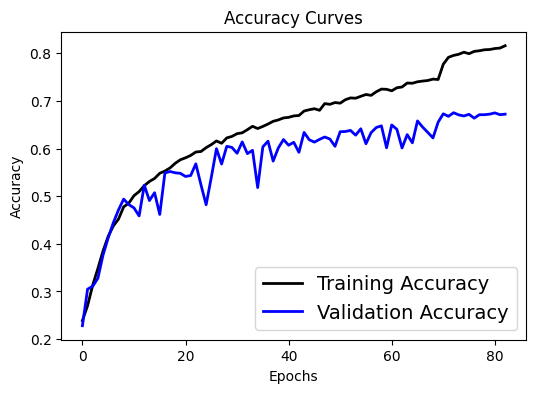

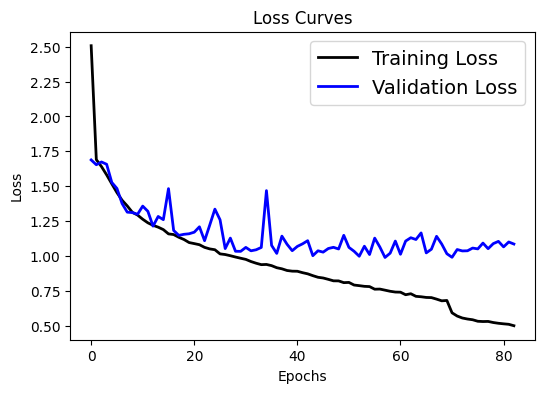

In [ ]:
plotting_epochs(history.history['accuracy'], history.history['val_accuracy'], "Accuracy")
plotting_epochs(history.history['loss'], history.history['val_loss'], "Loss")

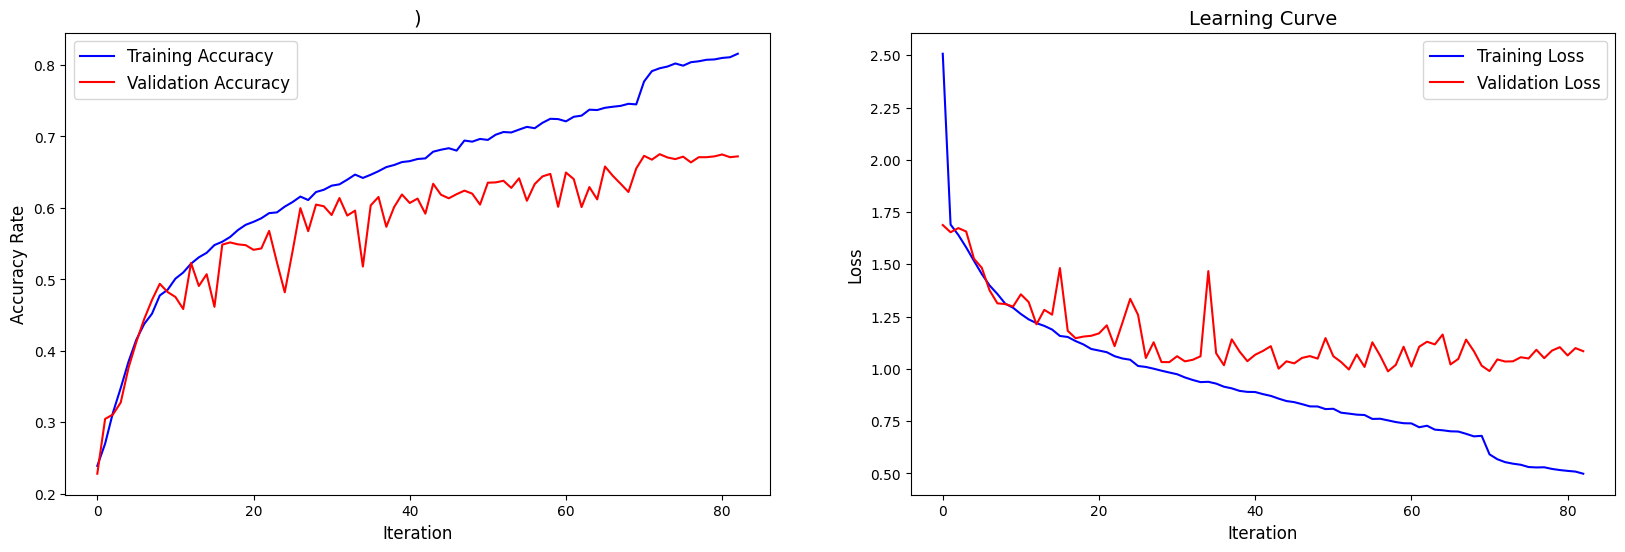

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

ax1.plot(history.history['accuracy'],'b', history.history['val_accuracy'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title(')',fontsize=14)

ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(history.history['loss'], 'b',history.history['val_loss'],'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve',fontsize=14)
ax2.legend(['Training Loss','Validation Loss'],fontsize=12,loc='best')

# plt.savefig('crosse_results.png')
plt.show()

82/82 [==============================] - 2s 28ms/step


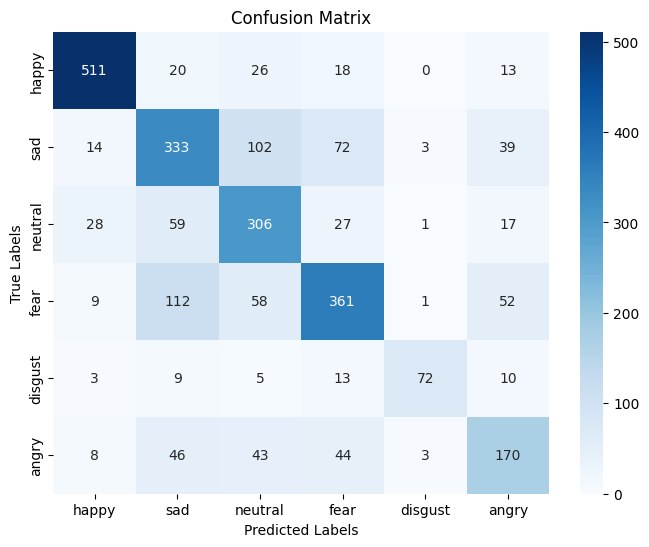

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a trained model named 'model' and test data X_test with corresponding true labels Y_test

# Make predictions on the test data
Y_pred = model.predict(X_test_female)

# Get the class labels with the highest probability for each prediction
y_pred = np.argmax(Y_pred, axis=1)

# Get the true labels for the test data
y_true = np.argmax(Y_test_female, axis=1)

# Assuming you have the true labels (y_true) and predicted labels (y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a list of class labels
class_labels = ['happy', 'sad', 'neutral', 'fear', 'disgust', 'angry']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

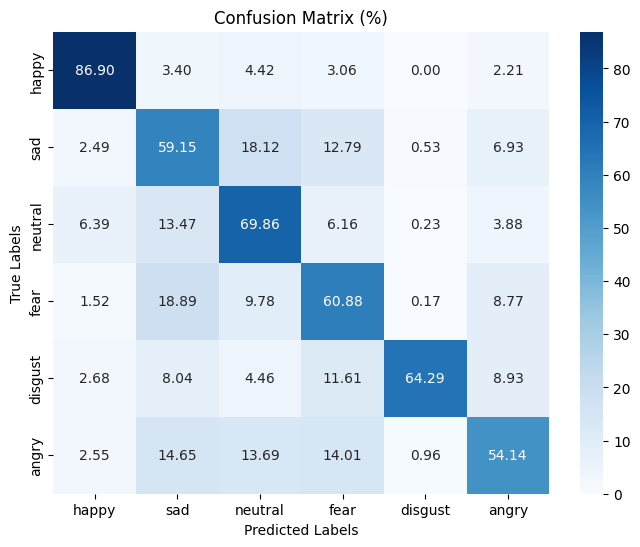

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and predicted labels (y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix to get percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create a list of class labels
class_labels = ['happy', 'sad', 'neutral', 'fear', 'disgust', 'angry']

# Plot the confusion matrix as percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix (%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:

from sklearn.metrics import classification_report

# Assuming you have a trained model named 'model' and test data X_test and corresponding labels Y_test

# Make predictions on the test data
Y_pred = model.predict(X_test_female)
predicted_labels = np.argmax(Y_pred, axis=1)

# Generate classification report
report = classification_report(np.argmax(Y_test_female, axis=1), predicted_labels)

print(report)

82/82 [==============================] - 2s 28ms/step
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       588
           1       0.59      0.54      0.56       563
           2       0.53      0.70      0.61       438
           3       0.65      0.62      0.63       593
           4       0.88      0.61      0.72       112
           5       0.57      0.55      0.56       314

    accuracy                           0.67      2608
   macro avg       0.69      0.65      0.66      2608
weighted avg       0.67      0.67      0.67      2608



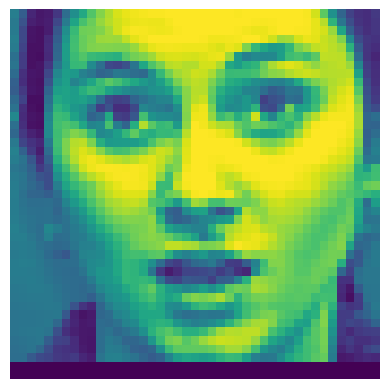

In [ ]:
import dlib
from PIL import Image
from skimage import io, color
import matplotlib.pyplot as plt

def detect_faces(image):
    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Convert image to RGB if it's in a different format
    if image.ndim == 2:
        # Grayscale image
        image = color.gray2rgb(image)
    elif image.ndim == 4:
        # RGBA image
        image = image[..., :3]

    # Run detector and get bounding boxes of the faces in the image
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(), x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image
img_path = '/content/drive/MyDrive/photos/S057_001_00000019.png'
image = io.imread(img_path)

# Detect faces
detected_faces = detect_faces(image)
tab_faces = []
# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    tab = np.asarray(face)
    tab_faces.append(tab)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

plt.show()


In [ ]:
image_to_predict = np.asarray(face)
img = cv2.resize(image_to_predict,(48,48),1)

In [ ]:
inv_dic = {
    0: 'happy',
    1: 'sad',
    2: 'suprise',
    3: 'fear',
    4: 'disgust',
    5: 'angry'
    # Add more class labels and indices as needed
}


In [ ]:
tab = []
tab.append(img)
tab = np.array(tab)
print(inv_dic[np.argmax(model.predict(tab))])
# plt.imshow(tab[0],cmap = plt.cm.binary)

1/1 [==============================] - 1s 1s/step
suprise


In [ ]:
for img in tab_faces :
  img = img = cv2.resize(img,(48,48),3)
  tab = []
  tab.append(img)
  tab = np.array(tab)
  print(inv_dic[np.argmax(model.predict(tab))])

1/1 [==============================] - 0s 24ms/step
suprise


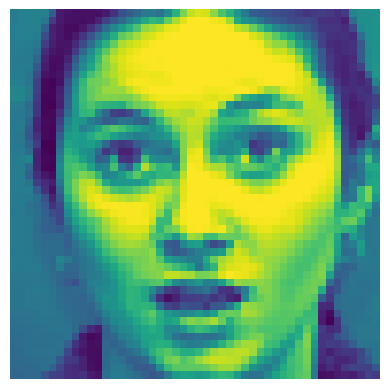

In [ ]:
# Load and display the original image
original_image = Image.fromarray(image)
plt.figure()
plt.imshow(original_image)
plt.axis('off')
plt.show()

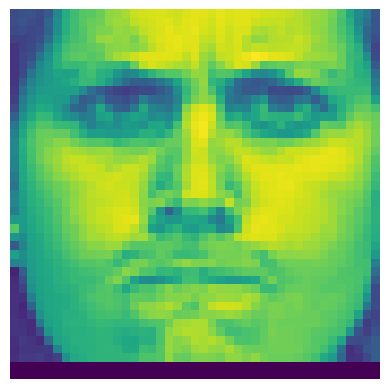

In [ ]:
import dlib
from PIL import Image
from skimage import io, color
import matplotlib.pyplot as plt

def detect_faces(image):
    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Convert image to RGB if it's in a different format
    if image.ndim == 2:
        # Grayscale image
        image = color.gray2rgb(image)
    elif image.ndim == 4:
        # RGBA image
        image = image[..., :3]

    # Run detector and get bounding boxes of the faces in the image
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(), x.right(), x.bottom()) for x in detected_faces]

    return face_frames

# Load image
img_path = '/content/drive/MyDrive/photos/S999_001_00000018.png'
image = io.imread(img_path)

# Detect faces
detected_faces = detect_faces(image)
tab_faces = []
# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    tab = np.asarray(face)
    tab_faces.append(tab)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

plt.show()

In [ ]:
image_to_predict = np.asarray(face)
img = cv2.resize(image_to_predict,(48,48),1)

In [ ]:
inv_dic = {
    0: 'happy',
    1: 'sad',
    2: 'neutral',
    3: 'fear',
    4: 'disgust',
    5: 'angry'
    # Add more class labels and indices as needed
}


In [ ]:
tab = []
tab.append(img)
tab = np.array(tab)
print(inv_dic[np.argmax(model.predict(tab))])
# plt.imshow(tab[0],cmap = plt.cm.binary)

1/1 [==============================] - 0s 30ms/step
neutral


In [ ]:
for img in tab_faces :
  img = img = cv2.resize(img,(48,48),3)
  tab = []
  tab.append(img)
  tab = np.array(tab)
  print(inv_dic[np.argmax(model.predict(tab))])

1/1 [==============================] - 0s 25ms/step
neutral


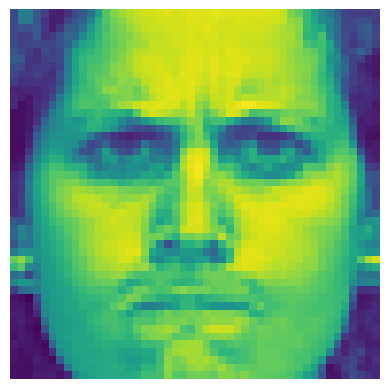

In [ ]:
# Load and display the original image
original_image = Image.fromarray(image)
plt.figure()
plt.imshow(original_image)
plt.axis('off')
plt.show()

In [ ]:
# def identity_block(X, f, filters, stage, block):
#     """
#     Implementation of the identity block

#     Arguments:
#     X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
#     f -- integer, specifying the shape of the middle CONV's window for the main path
#     filters -- python list of integers, defining the number of filters in the CONV layers of the main path
#     stage -- integer, used to name the layers, depending on their position in the network
#     block -- string/character, used to name the layers, depending on their position in the network

#     Returns:
#     X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
#     """

#     # defining name basis
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     # Retrieve Filters
#     F1, F2, F3 = filters

#     # Save the input value. You'll need this later to add back to the main path.
#     X_shortcut = X

#     # First component of main path
#     X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
#     X = Activation('relu')(X)


#     # Second component of main path
#     X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
#     X = Activation('relu')(X)

#     # Third component of main path
#     X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

#     # Final step: Add shortcut value to main path, and pass it through a RELU activation
#     X = Add()([X, X_shortcut])
#     X = Activation('relu')(X)


#     return X

In [ ]:
# def convolutional_block(X, f, filters, stage, block, s = 2):
#     """
#     Implementation of the convolutional block

#     Arguments:
#     X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
#     f -- integer, specifying the shape of the middle CONV's window for the main path
#     filters -- python list of integers, defining the number of filters in the CONV layers of the main path
#     stage -- integer, used to name the layers, depending on their position in the network
#     block -- string/character, used to name the layers, depending on their position in the network
#     s -- Integer, specifying the stride to be used

#     Returns:
#     X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
#     """

#     # defining name basis
#     conv_name_base = 'res' + str(stage) + block + '_branch'
#     bn_name_base = 'bn' + str(stage) + block + '_branch'

#     # Retrieve Filters
#     F1, F2, F3 = filters

#     # Save the input value
#     X_shortcut = X


#     ##### MAIN PATH #####
#     # First component of main path
#     X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
#     X = Activation('relu')(X)


#     # Second component of main path
#     X = Conv2D(F2, (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer=glorot_uniform(seed =0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
#     X = Activation('relu') (X)

#     # Third component of main path
#     X = Conv2D(F3, (1,1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer=glorot_uniform(seed =0))(X)
#     X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

#     ##### SHORTCUT PATH ####
#     X_shortcut = Conv2D(F3, (1,1), strides = (s,s), padding = 'valid', name = conv_name_base + '1', kernel_initializer=glorot_uniform(seed =0))(X_shortcut)
#     X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

#     # Final step: Add shortcut value to main path, and pass it through a RELU activation
#     X = Add()([X, X_shortcut])
#     X = Activation('relu')(X)


#     return X